# Getting Started with Matplotlib

We need matplotlib.pyplot for plotting.

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

### About the Data

In this notebook, we will be working with 2 datasets:

- Facebook's stock price throughout 2018 (obtained using the [stock_analysis package](https://github.com/stefmolin/stock-analysis))
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

### Plotting lines

<function matplotlib.pyplot.show(close=None, block=None)>

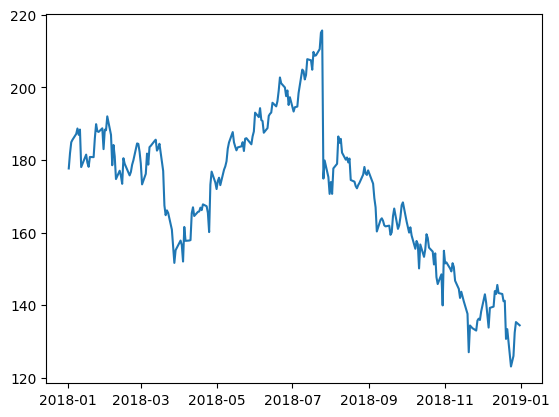

In [65]:
fb = pd.read_csv('/fb_stock_prices_2018.csv', index_col='date', parse_dates = True)

plt.plot(fb.index, fb.open)
plt.show

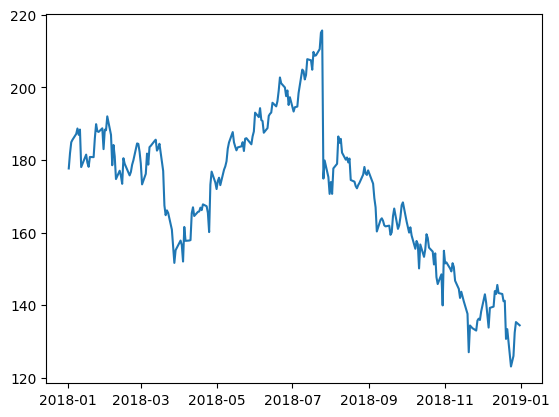

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

fb = pd.read_csv(
 '/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
 )

plt.plot(fb.index, fb.open)


### Scatter plots

We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with 'k--' or a red
scatter plot with 'ro' :

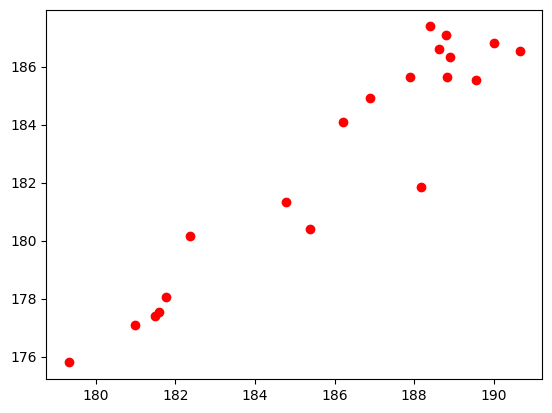

In [67]:
plt.plot('high', 'low', 'ro', data=fb.head(20))

### Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

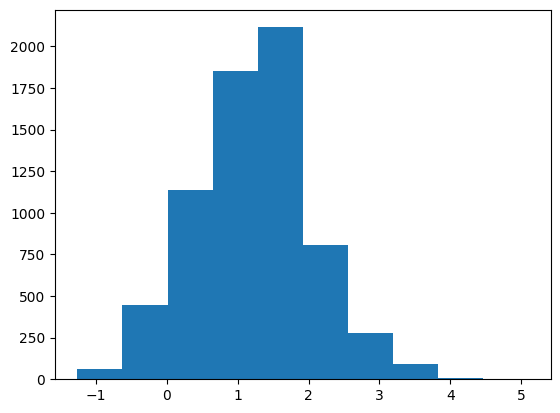

In [68]:
quakes = pd.read_csv('/earthquakes-1.csv')
plt.hist(quakes.query('magType == "ml"').mag)

### Bin size matters

Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

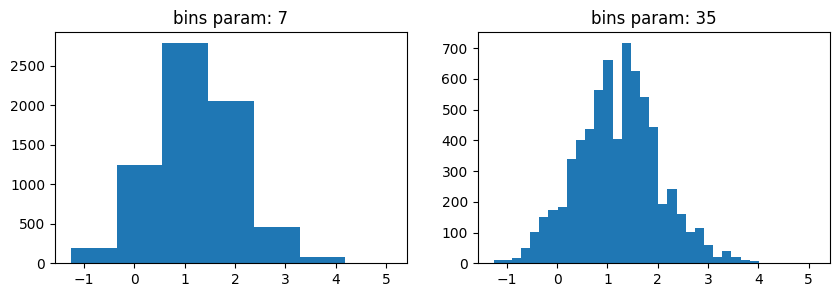

In [69]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
  ax.hist(x, bins=bins)
  ax.set_title(f'bins param: {bins}')


### Plot components

## Figure

Top-level object that holds the other plot components.

In [70]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

## Axes
Individual plots contained within the Figure .

## Creating subplots

Simply specify the number of rows and columns to create:

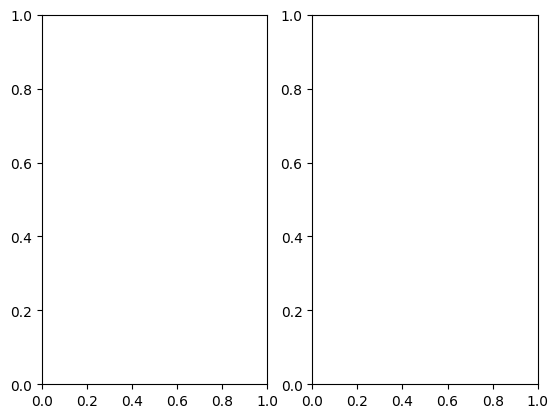

In [71]:
fig, axes = plt.subplots(1, 2)

As an alternative to using plt.subplots() we can add the Axes to the Figure on our own. This allows for some more complex layouts, such as picture in picture:

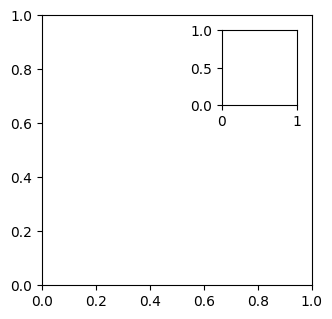

In [72]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

## Creating Plot Layouts with gridspec

We can create subplots with varying sizes as well:


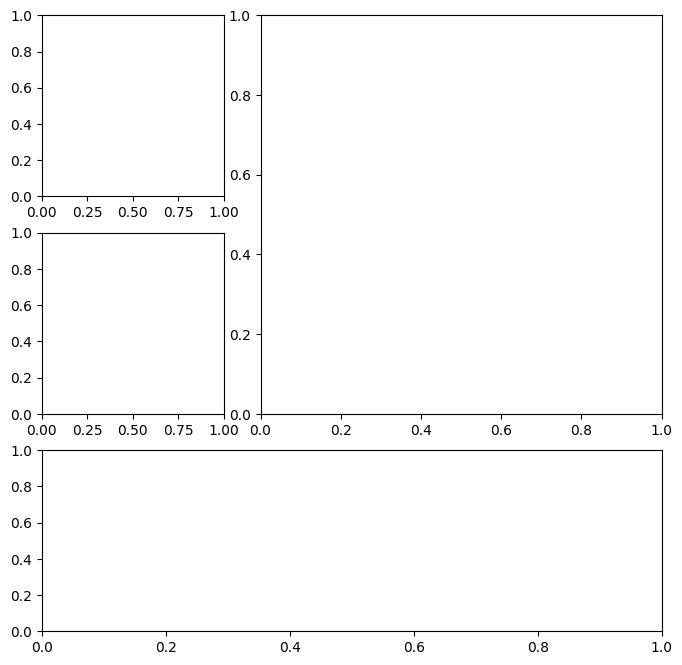

In [73]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

## Saving plots

Use plt.savefig() to save the last created plot. To save a specific Figure object, use its savefig() method.

In [74]:
fig.savefig('empty.png')

###Cleaning up

It's important to close resources when we are done with them. We use plt.close() to do so. If we pass in nothing, it will close the last plot, but we can pass the specific
Figure to close or say 'all' to close all Figure objects that are open. Let's close all the Figure objects that are open with plt.close() :

In [75]:
plt.close('all')

## Additional plotting options

### Specifying figure size

Just pass the figsize parameter to plt.figure() . It's a tuple of (width, height):

In [76]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

This can be specified when creating subplots as well:

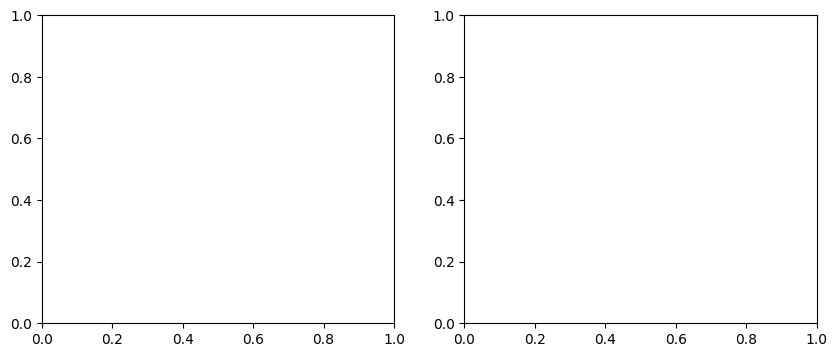

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

## rcParams

A small subset of all the available plot settings (shuffling to get a good variation of options):

In [78]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.titleweight',
 'boxplot.whiskerprops.linestyle',
 'date.autoformatter.day',
 'figure.constrained_layout.hspace',
 'figure.titlesize',
 'image.interpolation_stage',
 'keymap.copy',
 'legend.framealpha',
 'legend.handleheight',
 'lines.dash_joinstyle',
 'lines.markerfacecolor',
 'mathtext.default',
 'mathtext.fallback',
 'pdf.compression',
 'svg.fonttype',
 'text.usetex',
 'yaxis.labellocation',
 'ytick.major.size',
 'ytick.minor.visible']

We can check the current default figsize using rcParams

In [79]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):

In [80]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use rcdefaults() to restore the defaults:

In [81]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [82]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default